Reinforcement Learning (RL) - это раздел машинного обучения, в котором агент обучается принимать решения, взаимодействуя с окружающей средой, с целью максимизации какой-то числовой награды. В отличие от традиционных методов обучения с учителем, где модель обучается на основе помеченных примеров, в RL агент самостоятельно исследует среду, делает решения и корректирует свои стратегии на основе полученного опыта.

Давайте рассмотрим основные компоненты RL:

1. **Агент (Agent):**
   - Это сущность, которая принимает решения в среде. Это может быть робот, программный агент, или что-то еще, что может воздействовать на окружающую среду.

2. **Среда (Environment):**
   - Это контекст, в котором действует агент. Среда предоставляет обратную связь агенту в виде награды и изменений состояния после выполнения действий агента.

3. **Состояние (State):**
   - Это описание текущего положения системы в определенный момент времени. Состояние среды важно для агента, так как на его основе принимаются решения.

4. **Действие (Action):**
   - Это то, что агент предпринимает в среде. Действия могут быть дискретными (например, перемещение налево/направо) или непрерывными (например, управление моторами с изменяемой скоростью).

5. **Награда (Reward):**
   - Это численное значение, предоставляемое средой в ответ на действия агента. Цель агента - максимизировать награду, выбирая оптимальные стратегии.

6. **Функция полезности (Value Function):**
   - Это функция, оценивающая, насколько хороша для агента конкретная ситуация или состояние. Она помогает агенту принимать решения, учитывая долгосрочные последствия.

7. **Стратегия (Policy):**
   - Это стратегия, определяющая, какие действия агент должен предпринять в различных состояниях среды. Цель агента - оптимизировать стратегию для максимизации награды.

Процесс обучения можно представить следующим образом:
1. **Наблюдение (Observation):**
   - Агент получает наблюдения о текущем состоянии среды.

2. **Выбор действия (Action Selection):**
   - Агент выбирает действие на основе своей стратегии или политики.

3. **Исполнение действия (Action Execution):**
   - Агент выполняет выбранное действие в среде.

4. **Обратная связь (Feedback):**
   - Среда реагирует на действие агента, предоставляя награду и обновляя свое состояние.

5. **Обновление стратегии (Policy Update):**
   - Агент обновляет свою стратегию на основе полученной награды и опыта.

6. **Повторение (Iteration):**
   - Процесс повторяется, пока агент не достигнет оптимальной стратегии.

Примеры применения RL включают обучение игре в шахматы, управление роботами, управление финансовыми портфелями и многие другие области, где принятие последовательных решений требует оптимизации взаимодействия с окружающей средой.

Теперь давайте перейдем к одному из популярных алгоритмов в обучении с подкреплением - Q-learning.

**Q-learning:**

Q-learning - это алгоритм обучения с подкреплением, который используется для обучения агентов в средах с дискретным пространством действий. Он является примером метода "обучения без учителя" в RL.

В основе Q-learning лежит оценка функции Q, которая измеряет ценность пары состояние-действие. Значение Q обозначает, насколько хорошо определенное действие в определенном состоянии. Алгоритм обновляет Q-значения на основе полученной награды и использует их для принятия решений.

Основные шаги Q-learning:
1. **Инициализация Q-таблицы:**
   - Создание таблицы Q, где каждая ячейка представляет пару (состояние, действие) и инициализируется нулями.

2. **Выбор действия (Action Selection):**
   - Агент выбирает действие для выполнения на основе стратегии (например, ε-greedy для баланса исследования и использования текущих знаний).

3. **Исполнение действия (Action Execution):**
   - Агент выполняет выбранное действие в среде и наблюдает новое состояние и награду.

4. **Обновление Q-значения (Q-Value Update):**
   - Обновление Q-значения для пары (состояние, действие) на основе полученной награды и предыдущего Q-значения с использованием формулы обновления.
$$
   \[Q(s, a) = Q(s, a) + \alpha \cdot \left( r + \gamma \cdot \max_a Q(s', a) - Q(s, a) \right)\]
$$
   где:
   - Q(s, a) - Q-значение для пары (состояние, действие),
   - s - текущее состояние,
   - a - выполненное действие,
   - r - полученная награда,
   - s' - новое состояние после выполнения действия,
   - alpha - коэффициент обучения (learning rate),
   - gamma - коэффициент дисконтирования для учета будущих наград.

5. **Повторение (Iteration):**
   - Процесс выбора действия, его выполнения, обновления Q-значений повторяется до достижения оптимальной стратегии.

Q-learning может быть расширен на случай с непрерывным пространством действий или использован в комбинации с нейронными сетями для обучения более сложных стратегий.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
btc_data = pd.read_csv('Datasets/Binance_Dataset.csv')
btc_data.head()

,Unix,Date,Symbol,Open,High,Low,Close,Volume 1INCH,Volume BTC,tradecount
0,1707004800000,2024-02-04,1INCHBTC,0.000010,0.000010,0.000009,0.000009,144489.7,1.343291,717
1,1706918400000,2024-02-03,1INCHBTC,0.000010,0.000010,0.000009,0.000010,162563.1,1.527299,793
2,1706832000000,2024-02-02,1INCHBTC,0.000009,0.000010,0.000009,0.000009,304447.8,2.815638,1456
3,1706745600000,2024-02-01,1INCHBTC,0.000009,0.000009,0.000009,0.000009,188734.2,1.694450,898
4,1706659200000,2024-01-31,1INCHBTC,0.000010,0.000010,0.000009,0.000009,647740.2,6.165209,2904


In [9]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unix          1137 non-null   int64  
 1   Date          1137 non-null   object 
 2   Symbol        1137 non-null   object 
 3   Open          1137 non-null   float64
 4   High          1137 non-null   float64
 5   Low           1137 non-null   float64
 6   Close         1137 non-null   float64
 7   Volume 1INCH  1137 non-null   float64
 8   Volume BTC    1137 non-null   float64
 9   tradecount    1137 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 89.0+ KB


In [10]:
btc_data.describe()

,Unix,Open,High,Low,Close,Volume 1INCH,Volume BTC,tradecount
count,1.137000e+03,1137.000000,1137.000000,1137.000000,1137.000000,1.137000e+03,1137.000000,1137.000000
mean,1.657930e+12,0.000040,0.000042,0.000038,0.000040,1.127543e+06,68.650797,9511.919085
std,2.837099e+10,0.000028,0.000031,0.000026,0.000028,2.027989e+06,174.829212,16001.826160
min,1.608854e+12,0.000008,0.000008,0.000008,0.000008,1.845700e+04,0.169494,126.000000
25%,1.633392e+12,0.000017,0.000018,0.000016,0.000017,2.788496e+05,5.736841,2040.000000
50%,1.657930e+12,0.000032,0.000033,0.000031,0.000032,5.201585e+05,13.873513,4065.000000
75%,1.682467e+12,0.000059,0.000062,0.000057,0.000059,1.286116e+06,65.123939,10411.000000
max,1.707005e+12,0.000152,0.000168,0.000148,0.000152,3.191545e+07,3145.367039,226447.000000


In [11]:
btc_data.isnull().sum()

Unix            0
Date            0
Symbol          0
Open            0
High            0
Low             0
Close           0
Volume 1INCH    0
Volume BTC      0
tradecount      0
dtype: int64

In [13]:
btc_data.dtypes

Unix              int64
Date             object
Symbol           object
Open            float64
High            float64
Low             float64
Close           float64
Volume 1INCH    float64
Volume BTC      float64
tradecount        int64
dtype: object

In [16]:
# Преобразование формата даты
btc_data['Date'] = pd.to_datetime(btc_data['Date'], format="%Y-%m-%d", errors='coerce')

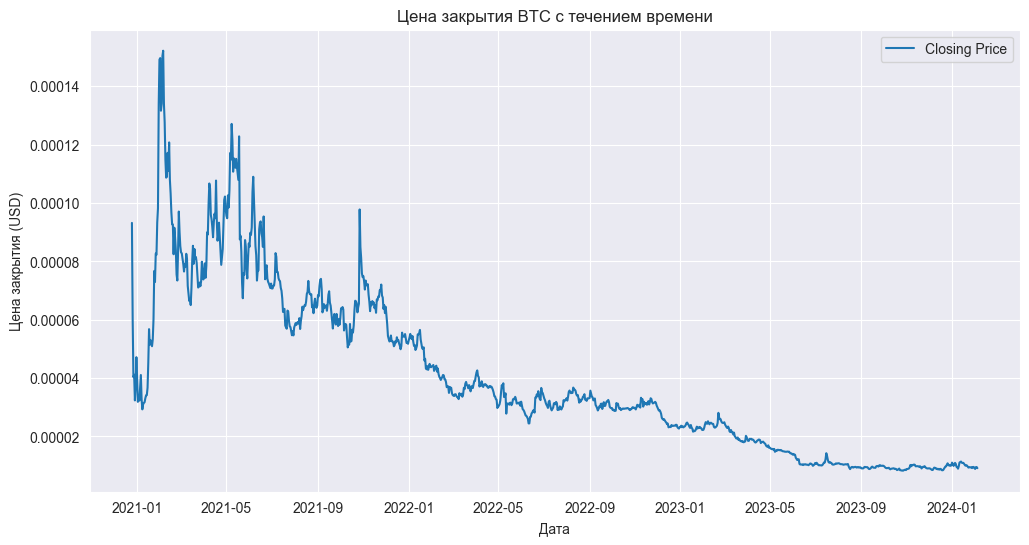

In [17]:
# Визуализация данных
# Построим временных рядов
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Closing Price')
plt.title('Цена закрытия BTC с течением времени')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (USD)')
plt.legend()
plt.show()

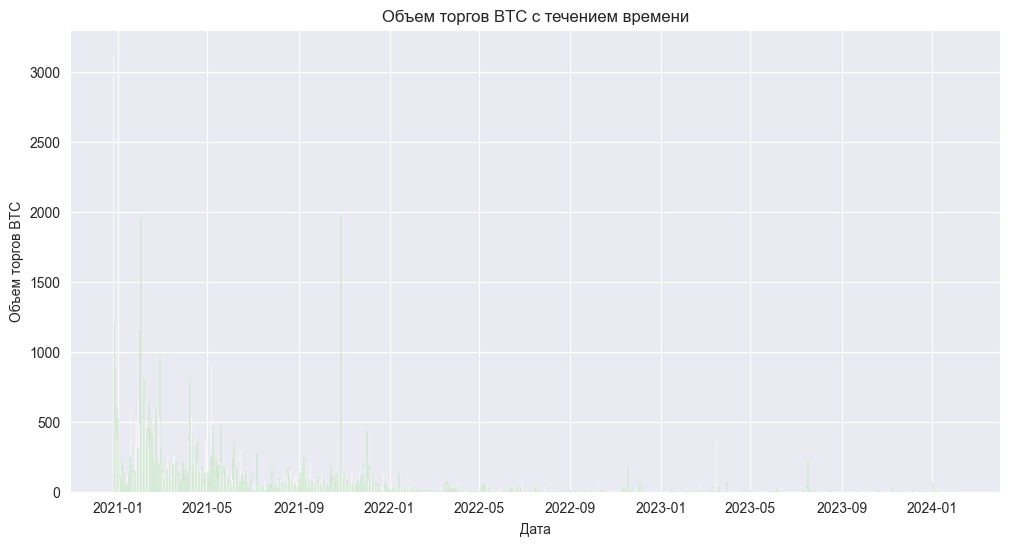

In [18]:
#Построим график объема торгов с течением времени
plt.figure(figsize=(12, 6))
plt.bar(btc_data['Date'], btc_data['Volume BTC'], color='green', alpha=0.5)
plt.title('Объем торгов BTC с течением времени')
plt.xlabel('Дата')
plt.ylabel('Объем торгов BTC')
plt.show()

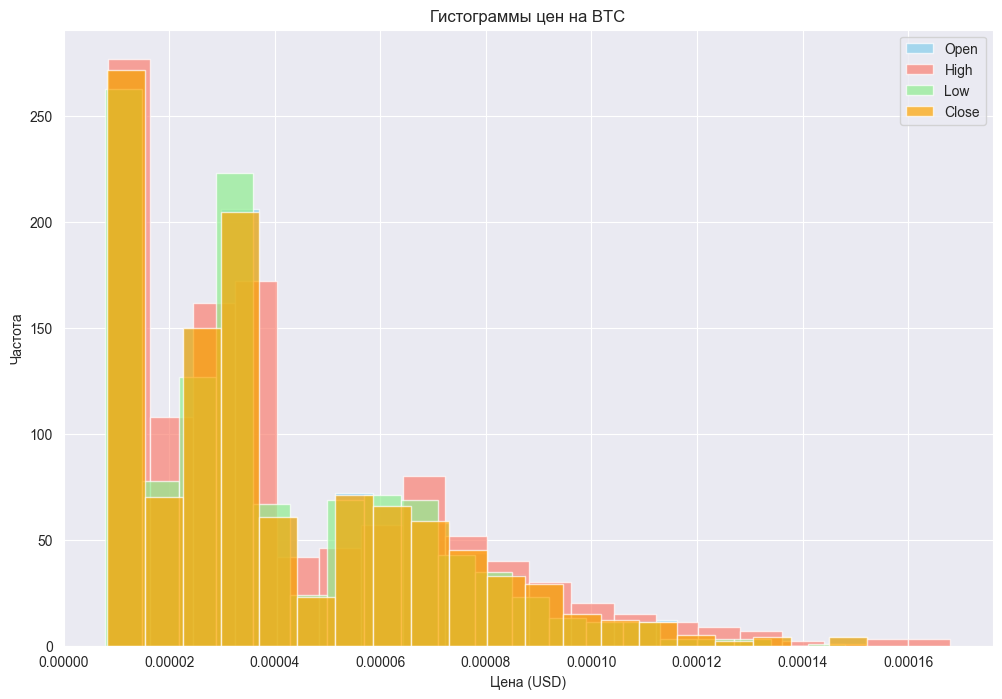

In [20]:
# Гистограммы
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']
plt.figure(figsize=(12, 8))

for i, column in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.hist(btc_data[column], bins=20, alpha=0.7, color=colors[i], label=column)

plt.title('Гистограммы цен на BTC')
plt.xlabel('Цена (USD)')
plt.ylabel('Частота')
plt.legend()
plt.show()


In [21]:
# Выберем только числовые столбцы для корреляционной матрицы
num_col = btc_data.select_dtypes(include=['float64']).columns
corr = btc_data[num_col].corr()

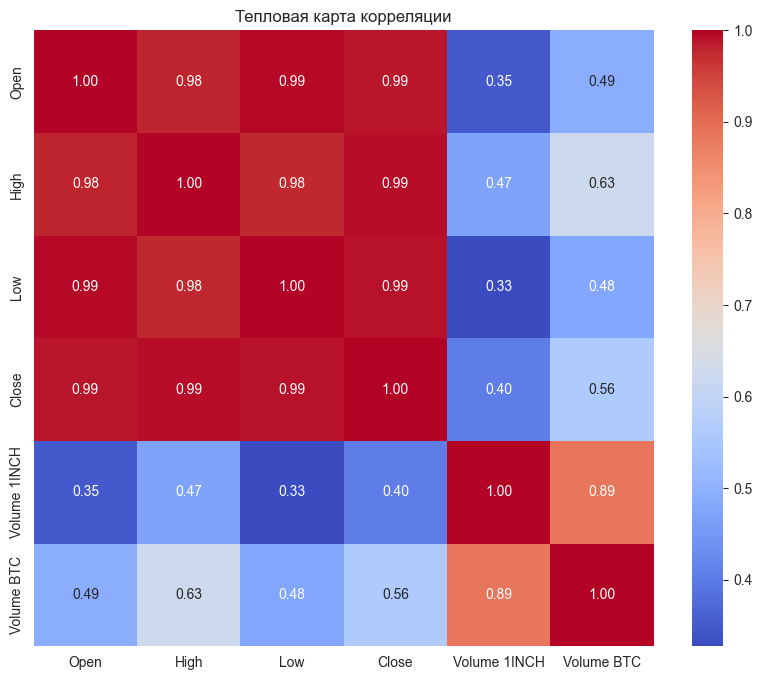

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()

In [26]:
# Масштабируем объекты с использованием min-max масштабирования
scaler = MinMaxScaler()
fs = ['Open', 'High', 'Low', 'Close', 'Volume BTC', 'Volume 1INCH', 'tradecount']
btc_data[fs] = scaler.fit_transform(btc_data[fs])

In [27]:
window_size = 10
btc_data['SMA'] = btc_data['Close'].rolling(window=window_size).mean()

In [28]:
print("Обработанные данные:")
print(btc_data.head())

Обработанные данные:
            Unix       Date    Symbol      Open      High       Low     Close  \
0  1707004800000 2024-02-04  1INCHBTC  0.008477  0.006769  0.009698  0.006114   
1  1706918400000 2024-02-03  1INCHBTC  0.008616  0.007395  0.009912  0.008754   
2  1706832000000 2024-02-02  1INCHBTC  0.004099  0.006957  0.007916  0.008545   
3  1706745600000 2024-02-01  1INCHBTC  0.006253  0.004638  0.007844  0.004307   
4  1706659200000 2024-01-31  1INCHBTC  0.008963  0.009714  0.009841  0.006392   

   Volume 1INCH  Volume BTC  tradecount  SMA  
0      0.003951    0.000373    0.002611  NaN  
1      0.004518    0.000432    0.002947  NaN  
2      0.008966    0.000841    0.005877  NaN  
3      0.005338    0.000485    0.003411  NaN  
4      0.019729    0.001906    0.012275  NaN  


# Определим параметры Q-обучения

In [29]:
gamma = 0.9  # Коэффициент дисконтирования
alpha = 0.1  # Скорость обучения
epsilon = 0.1

# Определим алгоритм Q-обучения

In [30]:
def q_learning(Q, state, action, reward, next_state):
    current_value = Q[state, action]
    max_future_value = np.max(Q[next_state, :])
    new_value = (1 - alpha) * current_value + alpha * (reward + gamma * max_future_value)
    Q[state, action] = new_value
    return Q

In [31]:
train_data, test_data = train_test_split(btc_data, test_size=0.2, random_state=42)

In [32]:
# Инициализируем Q-таблицу
num_states = 100
num_actions = 2
Q = np.zeros((num_states, num_actions))

# Обучим модель

In [33]:
for index, row in train_data.iterrows():
    state = int(index % num_states)
    action = 1 if row['Close'] < row['SMA'] else 0  # Buy if the price is below the moving average, else sell
    reward = row['Close'] - row['SMA']  # Reward is the difference from the moving average
    next_state = int((index + 1) % num_states)  # Simple next state representation, adjust accordingly

    Q = q_learning(Q, state, action, reward, next_state)

# Протестируем модель

In [34]:
total_reward = 0
actions_taken = []

for index, row in test_data.iterrows():
    state = int(index % num_states)
    action = np.argmax(Q[state, :])
    actions_taken.append(action)
    reward = row['Close'] - row['SMA']
    total_reward += reward

# Покажем действия, предпринятые во время тестирования

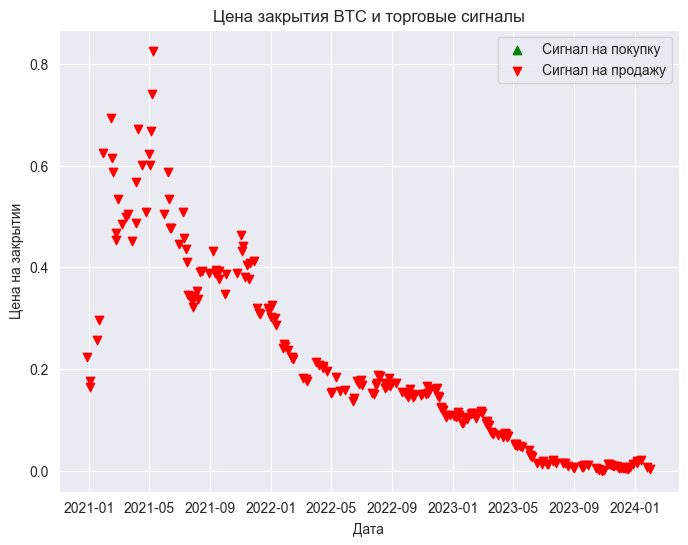

In [36]:
plt.figure(figsize=(8, 6))
# plt.plot(test_data['Date'], test_data['Close'], label='Цена во время закрытия')

# Фильтруем сигналы на покупку
buy_signals = test_data['Date'][np.array(actions_taken) == 1]
plt.scatter(buy_signals, test_data.loc[test_data['Date'].isin(buy_signals)]['Close'],
            color='green', label='Сигнал на покупку', marker='^')

# Фильтруем сигналы на продажу
sell_signals = test_data['Date'][np.array(actions_taken) == 0]
plt.scatter(sell_signals, test_data.loc[test_data['Date'].isin(sell_signals)]['Close'],
            color='red', label='Сигнал на продажу', marker='v')

plt.title('Цена закрытия BTC и торговые сигналы')
plt.xlabel('Дата')
plt.ylabel('Цена на закрытии')
plt.legend()
plt.show()